In this notebook, our goal is to train a CNN model using the CIFAR-10 image dataset. Additionally, we aim to explore and test various techniques, such as augmentation and transfer learning. To proceed, please follow the outlined steps.

# Libraries

Here, you can import the libraries you wish to use. Feel free to add more as needed.

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load the CIFAR10 dataset

Here, load the CIFAR-10 dataset from the prebuilt datasets in Keras as separate training and validation datasets.

In [4]:
class_names = ("Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck")

##################################################
################### YOUR CODES ###################

##################################################
(x_train, y_train), (x_val, y_val) = cifar10.load_data()


print('Training:', x_train.shape, y_train.shape)
print('Validation:', x_val.shape, y_val.shape)

170498071/170498071 [==============================] - 6s 0us/step
Training: (50000, 32, 32, 3) (50000, 1)
Validation: (10000, 32, 32, 3) (10000, 1)


Let's see some random examples.

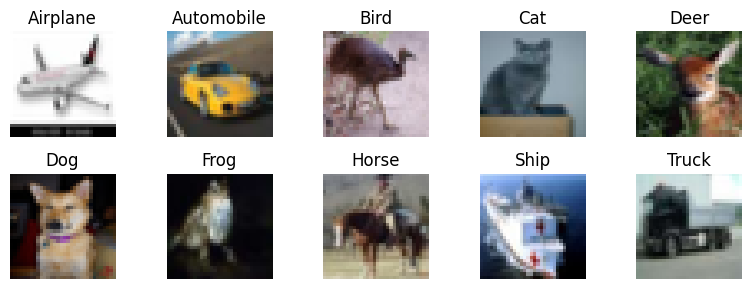

In [5]:
fig = plt.figure(figsize=(8, 3))

for class_index in range(len(class_names)):
    examples = x_train[y_train.flatten() == class_index]
    random_index = np.random.randint(0, examples.shape[0])
    image = examples[random_index]

    ax = fig.add_subplot(2, 5, class_index + 1)
    ax.imshow(image)
    ax.set_title(class_names[class_index])
    ax.axis('off')

plt.tight_layout()
plt.show()

Remember to `normalize` your data and encode your labels using the `one-hot encoding` technique.

In [6]:
##################################################
################### YOUR CODES ###################
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
x_train = (x_train).astype(np.float32) / 255
x_val = (x_val).astype(np.float32) / 255
##################################################

# a) Simple CNN model
In this section, you have to create your own simple CNN model using either the sequential or functional API provided by the Keras library. You can refer to the example provided in this [link](https://keras.io/examples/vision/mnist_convnet/) for guidance. Feel free to design your model according to your preferences.

In [5]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu',  padding='same'))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(Dropout(0.3))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu',  padding='same'))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(Dropout(0.6))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 128)       147584    
                                                        

Now, it's time to compile your model using an appropriate `loss function` and `optimizer`.

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    shuffle=True)

Epoch 1/10
500/500 [==============================] - 26s 26ms/step - loss: 1.5768 - accuracy: 0.4222 - val_loss: 1.2787 - val_accuracy: 0.5431
Epoch 2/10
500/500 [==============================] - 11s 21ms/step - loss: 1.1618 - accuracy: 0.5849 - val_loss: 0.9555 - val_accuracy: 0.6626
Epoch 3/10
500/500 [==============================] - 12s 24ms/step - loss: 0.9743 - accuracy: 0.6560 - val_loss: 0.8543 - val_accuracy: 0.7009
Epoch 4/10
500/500 [==============================] - 11s 21ms/step - loss: 0.8650 - accuracy: 0.6936 - val_loss: 0.7438 - val_accuracy: 0.7431
Epoch 5/10
500/500 [==============================] - 10s 20ms/step - loss: 0.7980 - accuracy: 0.7185 - val_loss: 0.6950 - val_accuracy: 0.7575
Epoch 6/10
500/500 [==============================] - 10s 20ms/step - loss: 0.7465 - accuracy: 0.7355 - val_loss: 0.6881 - val_accuracy: 0.7648
Epoch 7/10
500/500 [==============================] - 10s 19ms/step - loss: 0.7022 - accuracy: 0.7527 - val_loss: 0.6454 - val_accuracy:

Train your model for `10 epochs` and proper `batch_size`.

In [7]:
##################################################
################### YOUR CODES ###################
# history = model.fit(.............................)
##################################################

This function plots the `loss` and `accuracy` of your model by the model's history.

In [30]:
def plot_acc_loss(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize=(10, 3))
    fig.add_subplot(1, 2, 1)
    plt.plot(train_acc)
    plt.plot(val_acc)
    plt.title('Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    fig.add_subplot(1, 2, 2)
    plt.plot(train_loss)
    plt.plot(val_loss)
    plt.title('Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')

Let's see your model performance.

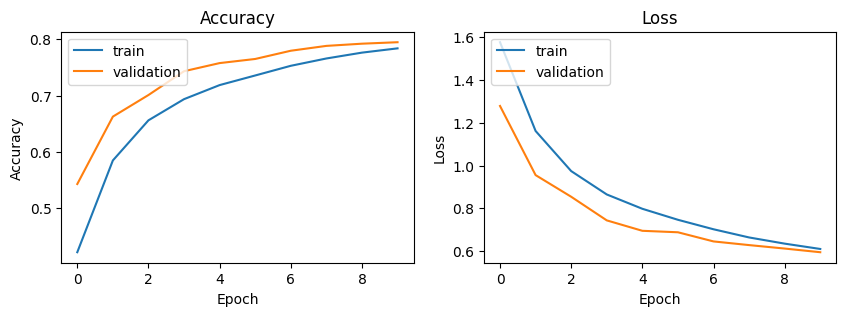

In [9]:
plot_acc_loss(history)

# b) Simple CNN model + augmentation
In this section, you will utilize your previous model and apply `at least two` suitable augmentation techniques. For further guidance, you can refer to this  [link](https://www.tensorflow.org/tutorials/images/data_augmentation).

In [18]:

# Data augmentation
datagen= ImageDataGenerator(vertical_flip=True, rotation_range= 30, validation_split=0.2,fill_mode ='nearest')

datagen.fit(x_train)

new_train = datagen.flow(x_train, y_train, batch_size =100)
new_val= datagen.flow(x_val, y_val, batch_size =100)

# datagen.fit(x_train)
# Generate augmented images
# augmented_images = datagen.flow(x_train, y_train, batch_size=9, shuffle=False)

# # Plot augmented images
# fig, axes = plt.subplots(3, 3, figsize=(8, 8))
# axes = axes.ravel()
# for i in range(9):
#     augmented_image = augmented_images.next()[0][0]
#     axes[i].imshow(augmented_image)
#     axes[i].axis('off')
#     axes[i].set_title(f'Augmented Image {i+1}')
# plt.tight_layout()
# plt.show()



In [19]:

# Train the model with augmented data
history = model.fit(new_train,
                    
                    epochs=10,
                    validation_data=new_val,
                    shuffle=True)

Epoch 1/10
500/500 [==============================] - 32s 62ms/step - loss: 1.2250 - accuracy: 0.5633 - val_loss: 1.0481 - val_accuracy: 0.6311
Epoch 2/10
500/500 [==============================] - 30s 61ms/step - loss: 1.1024 - accuracy: 0.6095 - val_loss: 0.9793 - val_accuracy: 0.6630
Epoch 3/10
500/500 [==============================] - 32s 64ms/step - loss: 1.0595 - accuracy: 0.6243 - val_loss: 0.9470 - val_accuracy: 0.6716
Epoch 4/10
500/500 [==============================] - 30s 59ms/step - loss: 1.0240 - accuracy: 0.6371 - val_loss: 0.9092 - val_accuracy: 0.6828
Epoch 5/10
500/500 [==============================] - 30s 59ms/step - loss: 0.9987 - accuracy: 0.6452 - val_loss: 0.9390 - val_accuracy: 0.6719
Epoch 6/10
500/500 [==============================] - 30s 61ms/step - loss: 0.9819 - accuracy: 0.6547 - val_loss: 0.8829 - val_accuracy: 0.6940
Epoch 7/10
500/500 [==============================] - 30s 60ms/step - loss: 0.9681 - accuracy: 0.6572 - val_loss: 0.9005 - val_accuracy:

Let's see your model performance with augmentation.

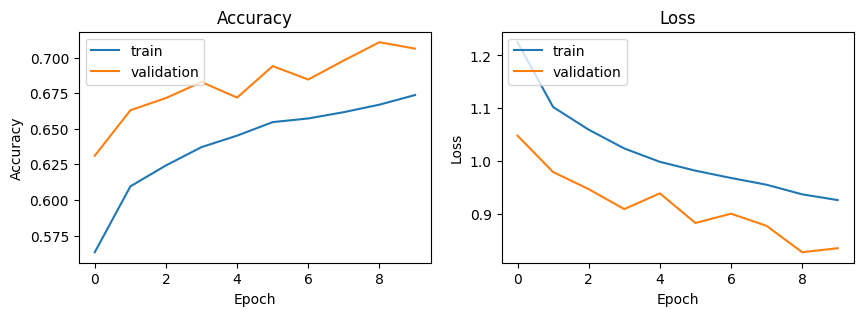

In [20]:
plot_acc_loss(history)

# c) Transfer learning: Using pretrained ResNet50 on ImageNet
For more detailed guidance, please refer to this [link](https://keras.io/guides/transfer_learning/).

## Resize input to 224 * 224 (`extra bonus`)

In [7]:
modelres = keras.Sequential()
modelres.add(layers.Input(shape=x_train[0].shape))
modelres.add(layers.Resizing(224,224))
resnetmodel = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
)

#train nakon va freeze show chizi ke yad gerefte ra emal mikonad
resnetmodel.trainable = False
modelres.add(resnetmodel)
modelres.add(layers.Flatten())
modelres.add(layers.Dense(10,activation= 'softmax'))
modelres.summary()



94765736/94765736 [==============================] - 4s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 10)                1003530   
                                                                 
Total params: 24,591,242
Trainable params: 1,003,530
Non-trainable params: 23,587,712
_________________________________________________________________


In [8]:
modelres.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
historyres = modelres.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    shuffle=True)

Epoch 1/10
500/500 [==============================] - 189s 349ms/step - loss: 2.6943 - accuracy: 0.2279 - val_loss: 2.2010 - val_accuracy: 0.3269
Epoch 2/10
500/500 [==============================] - 163s 326ms/step - loss: 2.0105 - accuracy: 0.3173 - val_loss: 1.8033 - val_accuracy: 0.3816
Epoch 3/10
500/500 [==============================] - 177s 354ms/step - loss: 1.8782 - accuracy: 0.3605 - val_loss: 1.9966 - val_accuracy: 0.3533
Epoch 4/10
500/500 [==============================] - 163s 326ms/step - loss: 1.8654 - accuracy: 0.3765 - val_loss: 1.6824 - val_accuracy: 0.4189
Epoch 5/10
500/500 [==============================] - 177s 354ms/step - loss: 1.7621 - accuracy: 0.4027 - val_loss: 1.4782 - val_accuracy: 0.4778
Epoch 6/10
500/500 [==============================] - 177s 355ms/step - loss: 1.7281 - accuracy: 0.4139 - val_loss: 1.7642 - val_accuracy: 0.4157
Epoch 7/10
500/500 [==============================] - 177s 355ms/step - loss: 1.7256 - accuracy: 0.4226 - val_loss: 1.4257 -

In [ ]:
plot_acc_loss(historyres)

## Use only the first three blocks (`extra bonus`)

In [12]:
resnetmodel=tf.keras.applications.ResNet101(
    include_top=False,
    weights="imagenet",
    input_shape=(32,32,3),
)
resnetmodel.trainable = False


171446536/171446536 [==============================] - 6s 0us/step


In [23]:
resnetmodel.summary(expand_nested=True)

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

In [13]:

for layer in resnetmodel.layers:
  if layer.name == 'conv3_block4_out' :
    layercorrect= layer
    break



In [27]:
flatlayer= layers.Flatten()(layercorrect.output)
middleDense= layers.Dense(1024, activation = 'relu')(flatlayer)
resultlayer= layers.Dense(10, activation = 'softmax')(middleDense)
model_resnet_new = keras.Model(inputs= [resnetmodel.input], outputs = [resultlayer])
model_resnet_new.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [37]:
model_resnet_new.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
historylast = model_resnet_new.fit(x_train, y_train,
                    batch_size=100,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    shuffle=True)

Epoch 1/10
500/500 [==============================] - 8s 12ms/step - loss: 1.4198 - accuracy: 0.4994 - val_loss: 1.3445 - val_accuracy: 0.5223
Epoch 2/10
500/500 [==============================] - 5s 9ms/step - loss: 1.3908 - accuracy: 0.5047 - val_loss: 1.4117 - val_accuracy: 0.5028
Epoch 3/10
500/500 [==============================] - 5s 9ms/step - loss: 1.3746 - accuracy: 0.5135 - val_loss: 1.3922 - val_accuracy: 0.5001
Epoch 4/10
500/500 [==============================] - 5s 10ms/step - loss: 1.3638 - accuracy: 0.5191 - val_loss: 1.5668 - val_accuracy: 0.4423
Epoch 5/10
500/500 [==============================] - 5s 10ms/step - loss: 1.3605 - accuracy: 0.5165 - val_loss: 1.3242 - val_accuracy: 0.5329
Epoch 6/10
500/500 [==============================] - 5s 10ms/step - loss: 1.3536 - accuracy: 0.5242 - val_loss: 1.3740 - val_accuracy: 0.5146
Epoch 7/10
500/500 [==============================] - 5s 10ms/step - loss: 1.3471 - accuracy: 0.5241 - val_loss: 1.4389 - val_accuracy: 0.4937
E

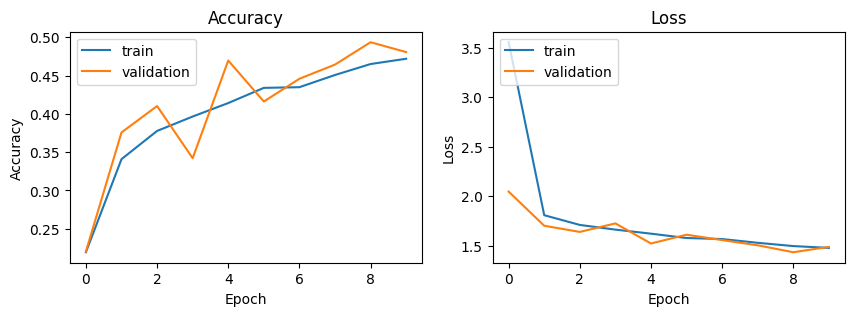

In [38]:
plot_acc_loss(history)